<a href="https://colab.research.google.com/github/Sevethseal/ML_projects/blob/main/Loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/loan-prediction-problem-dataset")

print("Path to dataset files:", path)

100%|██████████| 12.6k/12.6k [00:00<00:00, 7.90MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/altruistdelhite04/loan-prediction-problem-dataset/versions/1


In [3]:
import os
print("Files in dataset:")
for file in os.listdir(path):
    print(f"  {file}")

Files in dataset:
  test_Y3wMUE5_7gLdaTN.csv
  train_u6lujuX_CVtuZ9i.csv


In [4]:
train_df = pd.read_csv(os.path.join(path, 'train_u6lujuX_CVtuZ9i.csv'))
test_df = pd.read_csv(os.path.join(path, 'test_Y3wMUE5_7gLdaTN.csv'))

# Display basic information about the datasets
print("\nTrain dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

print("\nTrain dataset columns:")
print(train_df.columns.tolist())

print("\nFirst few rows of train dataset:")
print(train_df.head())

print("\nDataset info:")
print(train_df.info())


Train dataset shape: (614, 13)
Test dataset shape: (367, 12)

Train dataset columns:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

First few rows of train dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0  

In [8]:
print((train_df.isnull().sum() / len(train_df)) * 100)


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Dependents'),
  Text(3, 0, 'Self_Employed'),
  Text(4, 0, 'LoanAmount'),
  Text(5, 0, 'Loan_Amount_Term'),
  Text(6, 0, 'Credit_History')])

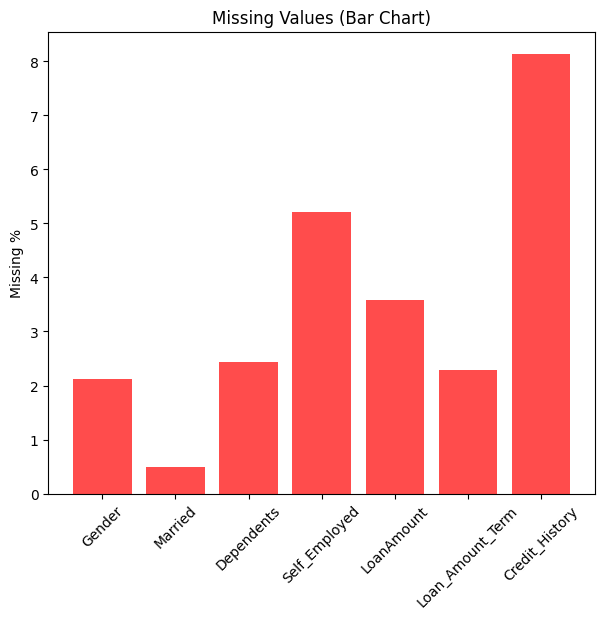

In [24]:
import matplotlib.pyplot as plt

missing_percentage=(train_df.isnull().sum() / len(train_df)) * 100
columns_with_missing_percentage=missing_percentage[missing_percentage>0]
print(columns_with_missing_percentage)

plt.figure(figsize=(24, 6))

plt.subplot(1,3,1)
plt.bar( columns_with_missing_percentage.index,columns_with_missing_percentage.values,color="red",alpha=0.7)
plt.title('Missing Values (Bar Chart)')
plt.ylabel('Missing %')
plt.xticks(rotation=45)

Text(0.5, 0, 'Missing %')

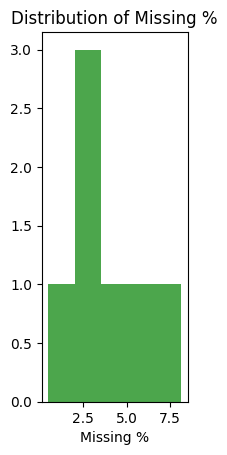

In [25]:
plt.subplot(1, 3, 3)
plt.hist(columns_with_missing_percentage.values, bins=5, color='green', alpha=0.7)
plt.title('Distribution of Missing %')
plt.xlabel('Missing %')


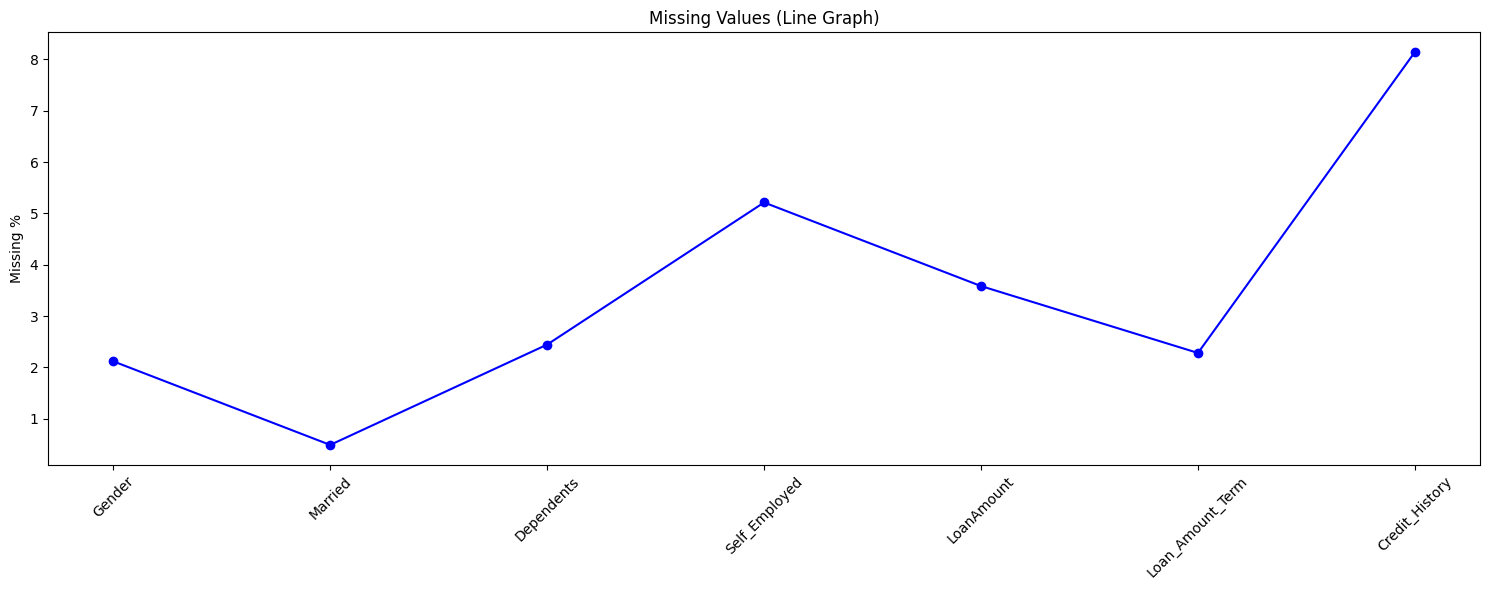

In [33]:
plt.figure(figsize=(15, 6))  # wider x-axis

plt.plot(columns_with_missing_percentage.values, marker='o', color='blue')
plt.title('Missing Values (Line Graph)')
plt.ylabel('Missing %')
plt.xticks(
    range(len(columns_with_missing_percentage)),
    columns_with_missing_percentage.index,
    rotation=45
)

plt.tight_layout()
plt.show()


In [37]:
numerical_cols= train_df.select_dtypes(include=['number']).columns.tolist()
print("Numerical",numerical_cols)
non_numerical_cols= train_df.select_dtypes(exclude=['number']).columns.tolist()
print("Non-Numerical",non_numerical_cols)

Numerical ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Non-Numerical ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [38]:
# Filter missing-percentage Series for only non-numerical columns
non_num_missing = columns_with_missing_percentage[columns_with_missing_percentage.index.isin(non_numerical_cols)]

print(non_num_missing)


Gender           2.117264
Married          0.488599
Dependents       2.442997
Self_Employed    5.211726
dtype: float64


In [39]:


for col in non_num_missing.index:  # columns that are non-numeric and have NaNs
    s = train_df[col]
    mode_vals = s.mode(dropna=True)

    if not mode_vals.empty:
        fill_val = mode_vals.iloc[0]
        # If it's a categorical column, make sure the fill value is an allowed category
        if pd.api.types.is_categorical_dtype(s):
            if fill_val not in s.cat.categories:
                s = s.cat.add_categories([fill_val])
        train_df[col] = s.fillna(fill_val)
    else:
        # Column is all NaN (no mode). Use a sentinel value.
        sentinel = "Unknown"
        if pd.api.types.is_categorical_dtype(s):
            s = s.cat.add_categories([sentinel])
        train_df[col] = s.fillna(sentinel)


/tmp/ipython-input-4144708474.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


In [40]:
print((train_df.isnull().sum() / len(train_df)) * 100)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [41]:
num_missing = columns_with_missing_percentage[columns_with_missing_percentage.index.isin(numerical_cols)]

print(num_missing)

LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64


In [44]:
for col in num_missing.index:   # loop through numerical columns with NaNs
    train_df[col] = train_df[col].fillna(train_df[col].median())


In [45]:
print((train_df.isnull().sum() / len(train_df)) * 100)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64


In [46]:
from sklearn.preprocessing import LabelEncoder
train_df = train_df.drop(columns=['Loan_ID'])

target_col = 'Loan_Status'

# One-hot encode all other categorical predictors
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Property_Area']

train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# 3. Label encode target variable (Loan_Status)
le = LabelEncoder()
train_df[target_col] = le.fit_transform(train_df[target_col])

print(train_df.head())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0             1.0            1         True        False         False   
1             1.0            0         True         True          True   
2             1.0            1         True         True         False   
3             1.0            1         True         True         False   
4             1.0            1         True        False         False   

   Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0         False          False                   Fa

In [47]:
import numpy as np
import pandas as pd

# 1) Total household income
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']

# 2) Loan to Income ratio (higher = riskier). Guard against zero/NaN.
train_df['LoanToIncome'] = np.where(
    train_df['TotalIncome'] > 0,
    train_df['LoanAmount'] / train_df['TotalIncome'],
    np.nan
)

# 3) EMI approximation (monthly repayment burden).
#    Uses LoanAmount / Loan_Amount_Term; guard against zero/NaN term.
train_df['EMI'] = np.where(
    train_df['Loan_Amount_Term'] > 0,
    train_df['LoanAmount'] / train_df['Loan_Amount_Term'],
    np.nan
)

# 4) Log transform of income to reduce skew (log1p handles zeros safely).
train_df['Log_TotalIncome'] = np.log1p(train_df['TotalIncome'])

# (Optional) If you want dependents-based features too, uncomment below:

# Derive numeric dependents count from one-hot columns if present
dep_cols = [c for c in ['Dependents_1','Dependents_2','Dependents_3+'] if c in train_df.columns]
if dep_cols:
    weights = [1 if c.endswith('_1') else 2 if c.endswith('_2') else 3 for c in dep_cols]
    train_df['DependentsCount'] = train_df[dep_cols].astype(int).dot(weights)
    # Income per dependent (add 1 to avoid division by zero when no dependents)
    train_df['IncomePerDependent'] = train_df['TotalIncome'] / (train_df['DependentsCount'] + 1)

print(train_df[['TotalIncome','LoanToIncome','EMI','Log_TotalIncome']].head())


   TotalIncome  LoanToIncome       EMI  Log_TotalIncome
0       5849.0      0.021884  0.355556         8.674197
1       6091.0      0.021015  0.355556         8.714732
2       3000.0      0.022000  0.183333         8.006701
3       4941.0      0.024287  0.333333         8.505525
4       6000.0      0.023500  0.391667         8.699681


In [51]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

In [52]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


In [53]:
target_col = 'Loan_Status'
X = train_df.drop(columns=[target_col]).copy()
y = train_df[target_col].astype(int)

# Make sure any bool dummies are numeric 0/1
bool_cols = X.select_dtypes(include=['bool']).columns
if len(bool_cols):
    X[bool_cols] = X[bool_cols].astype(int)

num_cols = X.columns  # all columns are numeric at this point

# Pipelines: LR needs scaling; tree models don't
preprocess_lr   = ColumnTransformer([('num', Pipeline([
    ('imp',   SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
]), num_cols)], remainder='drop')

preprocess_tree = ColumnTransformer([('num', Pipeline([
    ('imp',   SimpleImputer(strategy='median')),
]), num_cols)], remainder='drop')

models = {
    "LogisticRegression": Pipeline([
        ('prep', preprocess_lr),
        ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42))
    ]),
    "RandomForest": Pipeline([
        ('prep', preprocess_tree),
        ('clf', RandomForestClassifier(
            n_estimators=500, max_features='sqrt', class_weight='balanced', random_state=42
        ))
    ]),
    "HistGradientBoosting": Pipeline([
        ('prep', preprocess_tree),
        ('clf', HistGradientBoostingClassifier(
            learning_rate=0.05, max_depth=None, max_iter=500, random_state=42
        ))
    ]),
}

# Try to add LightGBM, XGBoost, CatBoost if available
try:
    from lightgbm import LGBMClassifier
    models["LightGBM"] = Pipeline([
        ('prep', preprocess_tree),
        ('clf', LGBMClassifier(
            n_estimators=800, learning_rate=0.05, num_leaves=31,
            subsample=0.8, colsample_bytree=0.8, random_state=42
        ))
    ])
except Exception as e:
    print("LightGBM not available:", e)

try:
    from xgboost import XGBClassifier
    models["XGBoost"] = Pipeline([
        ('prep', preprocess_tree),
        ('clf', XGBClassifier(
            n_estimators=800, learning_rate=0.05, max_depth=5,
            subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
            objective='binary:logistic', eval_metric='auc', random_state=42,
            use_label_encoder=False
        ))
    ])
except Exception as e:
    print("XGBoost not available:", e)

try:
    from catboost import CatBoostClassifier
    models["CatBoost"] = Pipeline([
        ('prep', preprocess_tree),
        ('clf', CatBoostClassifier(
            iterations=800, learning_rate=0.05, depth=6,
            l2_leaf_reg=3.0, random_state=42, verbose=False
        ))
    ])
except Exception as e:
    print("CatBoost not available:", e)

# --- Evaluate ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

rows = []
for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    rows.append({
        'Model': name,
        'Accuracy_mean':  np.mean(scores['test_accuracy']),
        'Accuracy_std':   np.std(scores['test_accuracy']),
        'AUC_mean':       np.mean(scores['test_roc_auc']),
        'F1_mean':        np.mean(scores['test_f1']),
        'Precision_mean': np.mean(scores['test_precision']),
        'Recall_mean':    np.mean(scores['test_recall']),
        'FitTime_sec':    np.mean(scores['fit_time'])
    })

results = pd.DataFrame(rows).sort_values('Accuracy_mean', ascending=False).reset_index(drop=True)
pd.set_option('display.precision', 4)
print(results)

best_model_name = results.loc[0, 'Model']
print("\nBest by Accuracy:", best_model_name)

                  Model  Accuracy_mean  Accuracy_std  AUC_mean  F1_mean  \
0          RandomForest         0.7997        0.0168    0.7682   0.8661   
1               XGBoost         0.7818        0.0187    0.7647   0.8501   
2              CatBoost         0.7769        0.0243    0.7649   0.8482   
3              LightGBM         0.7623        0.0319    0.7493   0.8352   
4  HistGradientBoosting         0.7622        0.0225    0.7557   0.8353   
5    LogisticRegression         0.7508        0.0304    0.7517   0.8222   

   Precision_mean  Recall_mean  FitTime_sec  
0          0.8008       0.9431       5.2560  
1          0.8052       0.9004       0.6908  
2          0.7963       0.9075       6.5554  
3          0.7958       0.8791       0.7864  
4          0.7960       0.8790       2.3339  
5          0.8073       0.8389       0.0804  

Best by Accuracy: RandomForest
